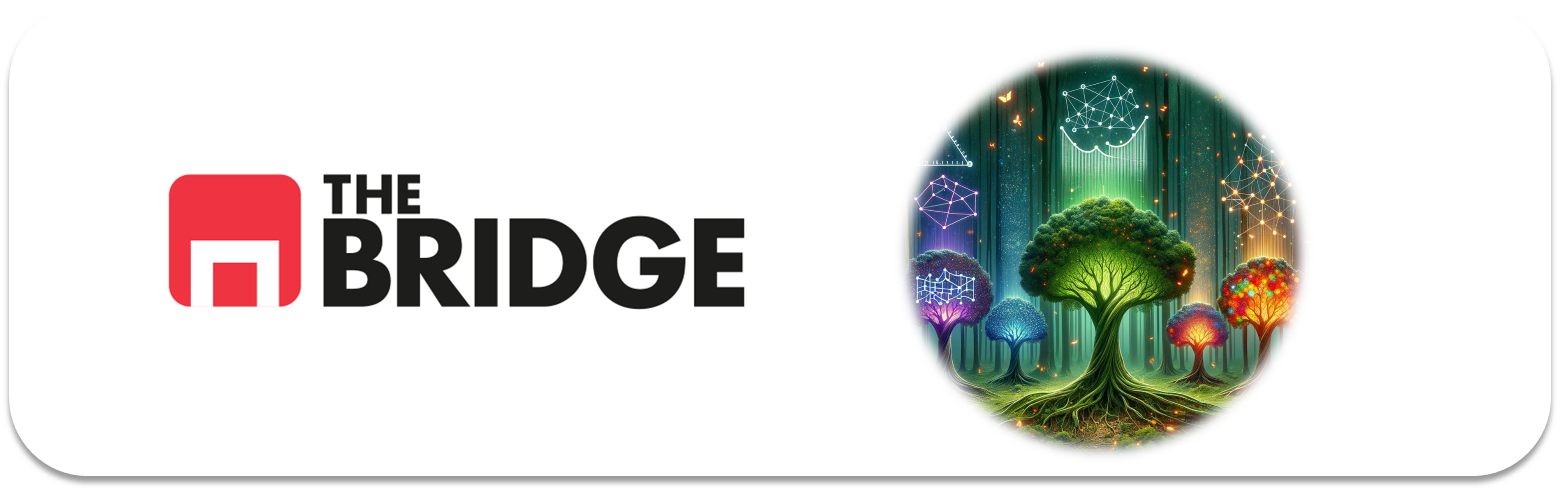

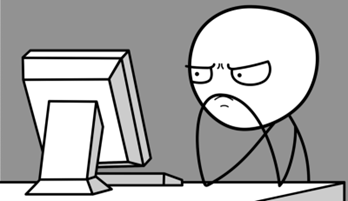

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [16]:
import seaborn as sns
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [5]:
# Generar el conjunto de datos de lunas
X, y = make_moons(n_samples=10000, noise=0.4)

In [6]:
# Crear un DataFrame para organizar los datos
moon_data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
moon_data['Target'] = y

In [7]:
# Extraer las características y los objetivos
X_moons = moon_data[['Feature1', 'Feature2']].values
y_moons = moon_data['Target'].values

<Axes: >

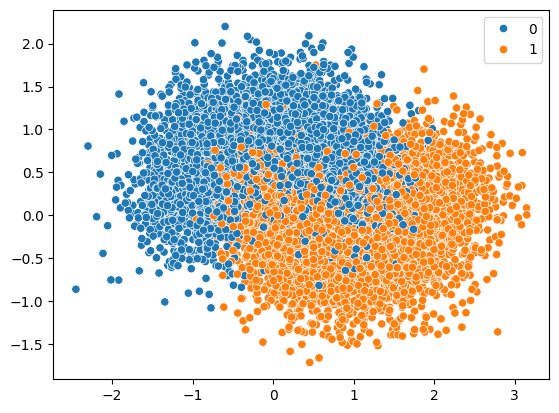

In [8]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [10]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Verificar la división mostrando las formas de los conjuntos resultantes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8000, 2) (2000, 2) (8000,) (2000,)


### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el árbol de decisión sin hiperparámetros adicionales
decision_tree = DecisionTreeClassifier()

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [12]:
from sklearn.metrics import classification_report

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Predecir utilizando el modelo entrenado
y_pred = decision_tree.predict(X_test)

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print(report)


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       984
           1       0.81      0.78      0.80      1016

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el árbol de decisión con los hiperparámetros especificados
tree_with_params = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)


### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [14]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Instanciar el árbol con hiperparámetros específicos
tree_with_params = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

# Entrenar el modelo
tree_with_params.fit(X_train, y_train)

# Predecir utilizando el modelo entrenado
y_pred_params = tree_with_params.predict(X_test)

# Generar el informe de clasificación
report_params = classification_report(y_test, y_pred_params)

# Mostrar el informe
print(report_params)


              precision    recall  f1-score   support

           0       0.85      0.86      0.86       984
           1       0.87      0.86      0.86      1016

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [17]:
from sklearn.model_selection import ShuffleSplit

# Usar ShuffleSplit para crear 1000 subconjuntos, cada uno con 100 instancias aleatorias
subset_generator = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

# Crear una lista para almacenar los índices de los subconjuntos generados
subsets_indices = [train_index for train_index, _ in subset_generator.split(X_train)]

# Verificar el número de subconjuntos y la longitud de cada uno
num_subsets = len(subsets_indices)
subset_lengths = np.unique([len(subset) for subset in subsets_indices])

print(num_subsets, subset_lengths)


1000 [100]


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [18]:
# Inicializar la lista del bosque para acumular los árboles de decisión
forest = []

# Entrenar un árbol de decisión por cada subconjunto
for subset_indices in subsets_indices:
    # Obtener el subconjunto de entrenamiento
    X_subset = X_train[subset_indices]
    y_subset = y_train[subset_indices]
    
    # Crear un nuevo árbol de decisión con los hiperparámetros especificados
    tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)
    
    # Entrenar el clasificador en el subconjunto
    tree.fit(X_subset, y_subset)
    
    # Añadir el clasificador entrenado al bosque
    forest.append(tree)

# Verificar el tamaño del bosque
print(len(forest))

1000


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

# Inicializar una lista para almacenar las medidas de precisión
accuracy_scores = []

# Evaluar cada árbol en el conjunto de prueba original
for tree in forest:
    # Hacer predicciones utilizando el árbol actual
    y_pred = tree.predict(X_test)
    
    # Calcular la precisión y añadirla a la lista
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Calcular la precisión media entre todos los árboles
mean_accuracy = np.mean(accuracy_scores)

# Mostrar la precisión media
print(mean_accuracy)


0.806571


El promedio de las medidas de precisión (accuracy) de todos los árboles del bosque en el conjunto de prueba es aproximadamente 0.80. Esto significa que, en promedio, cada árbol logra predecir correctamente el 80% de las instancias en el conjunto de prueba.


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [20]:
# Inicializar una lista para almacenar las predicciones de cada árbol
forest_predictions = []

# Recolectar las predicciones de cada árbol en el bosque
for tree in forest:
    # Hacer predicciones en el conjunto de prueba con el árbol actual
    predictions = tree.predict(X_test)
    
    # Añadir las predicciones a la lista de predicciones del bosque
    forest_predictions.append(predictions)

# Verificar el número de conjuntos de predicciones recopilados
print(len(forest_predictions))


1000


 ### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [21]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(n_trees):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

NameError: name 'n_trees' is not defined

In [24]:
from scipy.stats import mode
import numpy as np

# Convertir la lista de predicciones en un array 2D
forest_predictions_array = np.array(forest_predictions)

# Realizar "hard-voting" para determinar las predicciones finales
final_predictions_corrected = mode(forest_predictions_array, axis=0).mode[0]

# Verificar la longitud de las predicciones finales
print(final_predictions_corrected.shape)


()


### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [26]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np

# Convertir la lista de predicciones en un array 2D
forest_predictions_array = np.array(forest_predictions)

# Realizar "hard-voting" para determinar las predicciones finales
final_predictions_corrected = mode(forest_predictions_array, axis=0).mode[0]

# Calcular la precisión del consejo de árboles
ensemble_accuracy_corrected = accuracy_score(y_test, final_predictions_corrected)

# Mostrar la precisión del modelo en conjunto
print(ensemble_accuracy_corrected)


InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got 1 instead.